# Assignment 5 Deep Learning
    Name: Gokul Nithin Kumar Rajakumar
    Student ID: 801082252

# I. Overview

    In this assignment, the objective is to understand Deep Learning, its network architecture, hidden layers etc. and also learn to use TensorFlow for classifying the data.

    I accomplished it by first studying the class notes, watched few videos on Tensorflow. Thanks to all my friends in Piazza for discussing major issues in it and TA.

    I started experimenting this objective with the help of accident dataset. Following are the codes in Python 3. 

# II. Introduction of Dataset
    This dataset is all about predicting the number of accidents that happened during the period in the city of barcelona.
    It also incorporates the number of mild and serious injuries, the number of vehicles that were resposible for the accident 
    and the point of impact.
    In this dataset there are 15 different features such as
    i. ID
    ii. District Name
    iii. Neighborhood Name
    iv. Street
    v. Weekday
    vi. Month
    vii. Day
    etc....  

# Reading the Data

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset using pandas
df = pd.read_csv(".\\accidents_2017.csv")
df


,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365
5,2017S007775,Sant Martí,el Camp de l'Arpa del Clot,Indústria / Trinxant ...,Wednesday,September,20,12,Morning,1,0,1,2,2.183245,41.416336
6,2017S004484,Sant Martí,el Camp de l'Arpa del Clot,Trinxant / Indústria ...,Saturday,May,20,21,Afternoon,1,0,1,2,2.183245,41.416336
7,2017S010680,Sant Martí,el Camp de l'Arpa del Clot,Indústria ...,Tuesday,December,26,20,Afternoon,2,0,2,1,2.183561,41.416372
8,2017S005152,Sant Martí,el Camp de l'Arpa del Clot,Indústria ...,Monday,June,12,15,Afternoon,1,0,1,1,2.184059,41.416763
9,2017S003932,Sant Martí,el Camp de l'Arpa del Clot,Maragall ...,Wednesday,May,3,20,Afternoon,1,0,1,1,2.181225,41.413958


# Data Preprocessing

In [3]:
#to first get to know the information about all the features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10339 non-null object
Neighborhood Name    10339 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [4]:
#To check if there are any null values in the dataset
df.isna().any()

Id                   False
District Name        False
Neighborhood Name    False
Street               False
Weekday              False
Month                False
Day                  False
Hour                 False
Part of the day      False
Mild injuries        False
Serious injuries     False
Victims              False
Vehicles involved    False
Longitude            False
Latitude             False
dtype: bool

In [5]:
df['injury_num'] = np.where(df['Mild injuries'] > 0, 1, 0)

In [6]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["part_of_day_num"] = lb_make.fit_transform(df["Part of the day"])
df["weekday_num"] = lb_make.fit_transform(df["Weekday"])
df["month_num"] = lb_make.fit_transform(df["Month"])
df.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,injury_num,part_of_day_num,weekday_num,month_num
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045,1,1,0,10
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426,1,1,0,11
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885,1,0,0,2
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668,1,2,0,5
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365,1,0,4,8


## Observation
    Since all are FALSE, there are no samples with null values in them.

In [7]:
#to describe the entire dataset and to give the overall view of it.
df.describe()

,Day,Hour,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,injury_num,part_of_day_num,weekday_num,month_num
count,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000
mean,15.775994,13.811394,1.154174,0.023310,1.178644,1.920979,2.162832,41.399346,0.895348,0.623561,3.053293,5.703550
std,8.763455,5.316490,0.742294,0.163803,0.735145,0.714011,0.024176,0.021251,0.306120,0.681890,2.116404,3.371216
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.091855,41.323094,0.000000,0.000000,0.000000,0.000000
25%,8.000000,10.000000,1.000000,0.000000,1.000000,2.000000,2.144985,41.386288,1.000000,0.000000,1.000000,3.000000
50%,16.000000,14.000000,1.000000,0.000000,1.000000,2.000000,2.163399,41.396730,1.000000,1.000000,3.000000,6.000000
75%,23.000000,18.000000,1.000000,0.000000,1.000000,2.000000,2.180179,41.411038,1.000000,1.000000,5.000000,9.000000
max,31.000000,23.000000,10.000000,4.000000,10.000000,14.000000,2.222572,41.468244,1.000000,2.000000,6.000000,11.000000


# Visualization of the Data

In [8]:
# to determine the number of accident that happened during which part of the day
Dist_part_day=df['Part of the day'].value_counts().reset_index()
Dist_part_day

,index,Part of the day
0,Afternoon,5082
1,Morning,4067
2,Night,1190


[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Day')]

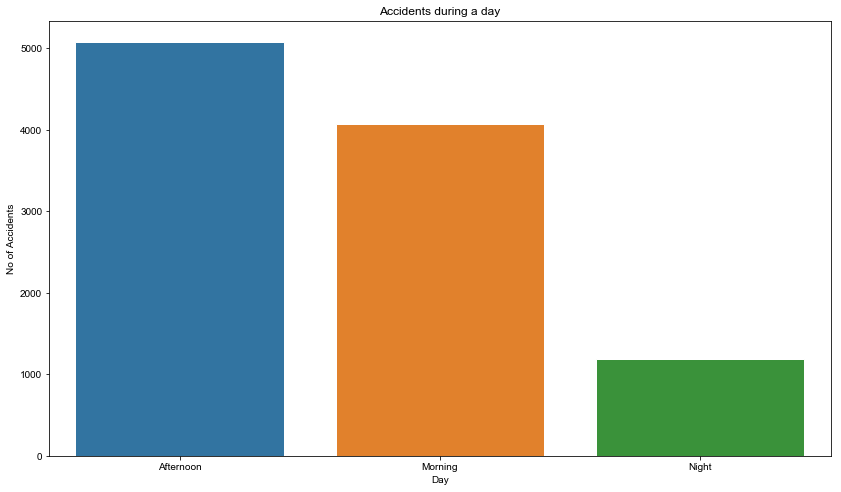

In [9]:
#plotting the graph between part_of_day vs Number of Accidents
plt.figure(figsize=(14,8))
plt.title('Accidents during a day')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="index", y="Part of the day", data=Dist_part_day.sort_values(by=['Part of the day'],ascending=False))
fig.set(xlabel='Day', ylabel='No of Accidents')

## Observation
    Here we could observe that more number of accidents occur during peak time(office hours) ie. during Morning. 

In [10]:
# to determine the number of accident that happened during which week of the month

Dist_weekday=df['Weekday'].value_counts().reset_index()
Dist_weekday

,index,Weekday
0,Friday,1761
1,Tuesday,1691
2,Thursday,1677
3,Wednesday,1650
4,Monday,1510
5,Saturday,1155
6,Sunday,895


[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Week')]

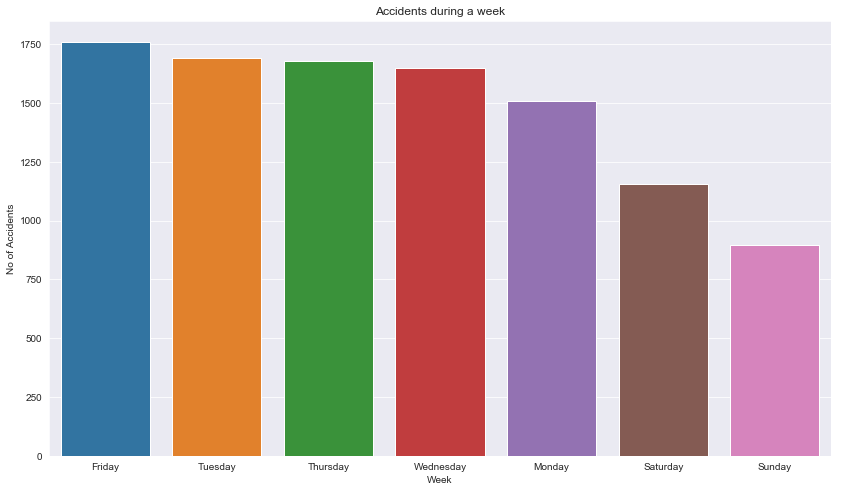

In [11]:
#plotting the graph between week vs Number of Accidents
plt.figure(figsize=(14,8))
plt.title('Accidents during a week')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="index", y="Weekday", data=Dist_weekday.sort_values(by=['Weekday'],ascending=False))
fig.set(xlabel='Week', ylabel='No of Accidents')

## Observation
    Here we could observe that more number of accidents occur during Friday. We could also say that it is due to 
    the start of the weekend that leads to reckless driving of the drivers.

In [12]:
# to determine the number of accident that happened during which month of the year
Dist_month=df['Month'].value_counts().reset_index()
Dist_month

,index,Month
0,November,991
1,May,963
2,March,935
3,October,928
4,July,918
5,June,908
6,April,845
7,January,844
8,February,824
9,September,769


[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Month')]

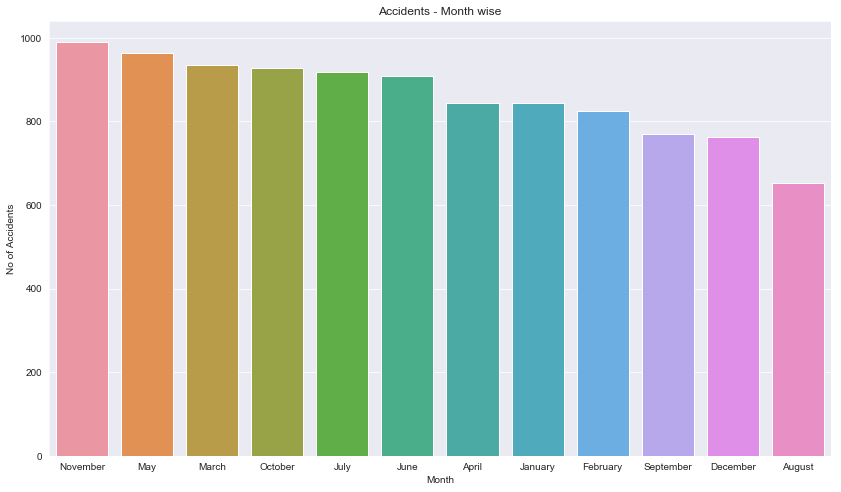

In [13]:
#plotting the graph between month vs Number of Accidents
plt.figure(figsize=(14,8))
plt.title('Accidents - Month wise')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="index", y="Month", data=Dist_month.sort_values(by=['Month'],ascending=False))
fig.set(xlabel='Month', ylabel='No of Accidents')

## Observation
    Here we could observe that more number of accidents occur during November. We could also say that it is due to 
    the start of the thanksgiving holidays and the approaching christmas and new year that leads to reckless driving 
    of the drivers.

In [14]:
# to determine the number of accident that happened during which part of the day
Dist_hour=df['Hour'].value_counts().reset_index()
Dist_hour

,index,Hour
0,14,738
1,13,719
2,18,675
3,15,666
4,19,648
5,16,645
6,9,642
7,17,638
8,12,624
9,8,610


[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Hour')]

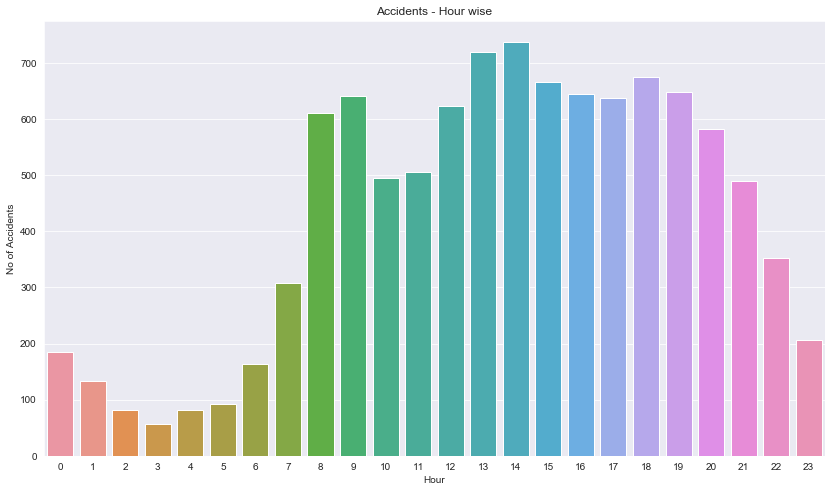

In [15]:
#plotting the graph between part_of_day vs Number of Accidents

plt.figure(figsize=(14,8))
plt.title('Accidents - Hour wise')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="index", y="Hour", data=Dist_hour.sort_values(by=['Hour'],ascending=False))
fig.set(xlabel='Hour', ylabel='No of Accidents')

## Observation
    Here we could observe that more number of accidents occur during peak time(office hours) when the office hours gets over. 

In [16]:
# to determine the number of mild and serious injuries that happened during which part of the day
Dist_injury_day=df[['Part of the day','Mild injuries','Serious injuries']].groupby(['Part of the day']).sum().reset_index()
Dist_injury_day

,Part of the day,Mild injuries,Serious injuries
0,Afternoon,5969,120
1,Morning,4627,79
2,Night,1337,42


[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Day')]

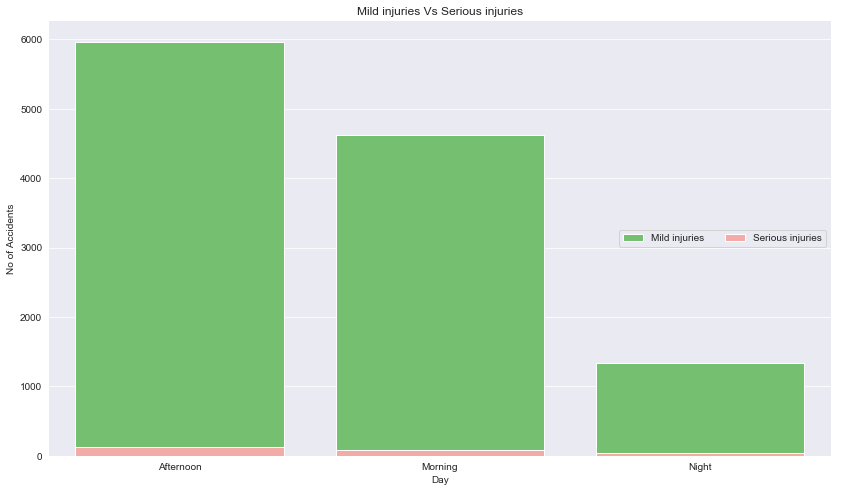

In [17]:
#plotting the graph between mild_injuries vs Number of Accidents and serious_injuries vs Number of Accidents
f, ax = plt.subplots(figsize=(14, 8))

sns.set_color_codes("muted")
sns.set_style(style='darkgrid')
sns.barplot(x="Part of the day", y="Mild injuries", data=Dist_injury_day,label="Mild injuries",color='g')

sns.set_color_codes("pastel")
plt.title('Mild injuries Vs Serious injuries')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="Part of the day", y="Serious injuries", data=Dist_injury_day,label="Serious injuries",color='r')

ax.legend(ncol=2, loc="center right", frameon=True)
sns.despine(left=True, bottom=True)
fig.set(xlabel='Day', ylabel='No of Accidents')

## Observation
    Here we could observe that the number of Mild Injuries is for more than number of number of Serious Injuries. 

In [18]:
# to determine the number of mild and serious injuries that happened during which part of the week
Dist_injury_week=df[['Weekday','Mild injuries','Serious injuries']].groupby(['Weekday']).sum().reset_index()
Dist_injury_week

,Weekday,Mild injuries,Serious injuries
0,Friday,1984,44
1,Monday,1725,27
2,Saturday,1414,33
3,Sunday,1047,39
4,Thursday,1946,33
5,Tuesday,1946,34
6,Wednesday,1871,31


[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Week')]

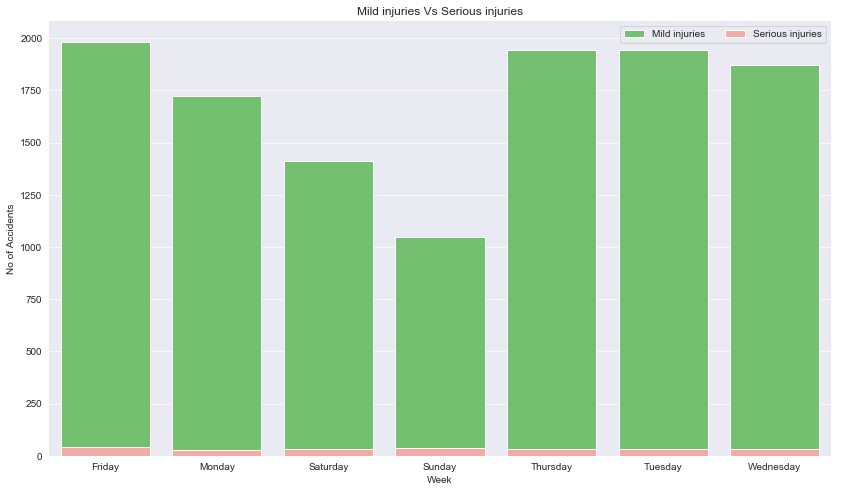

In [19]:
#plotting the graph between mild_injuries vs Number of Accidents and serious_injuries vs Number of Accidents

f, ax = plt.subplots(figsize=(14, 8))

sns.set_color_codes("muted")
sns.set_style(style='darkgrid')
sns.barplot(x="Weekday", y="Mild injuries", data=Dist_injury_week,label="Mild injuries",color='g')

sns.set_color_codes("pastel")
plt.title('Mild injuries Vs Serious injuries')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="Weekday", y="Serious injuries", data=Dist_injury_week,label="Serious injuries",color='r')

ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
fig.set(xlabel='Week', ylabel='No of Accidents')

## Observation
    Here we could observe that the number of Mild Injuries is for more than number of number of Serious Injuries.

In [20]:
# to determine the number of mild and serious injuries that happened during which part of the year

Dist_injury_month=df[['Month','Mild injuries','Serious injuries']].groupby(['Month']).sum().reset_index()
Dist_injury_month

,Month,Mild injuries,Serious injuries
0,April,912,23
1,August,793,10
2,December,883,13
3,February,925,17
4,January,975,14
5,July,1079,22
6,June,1067,20
7,March,1071,15
8,May,1063,28
9,November,1172,38


[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Month')]

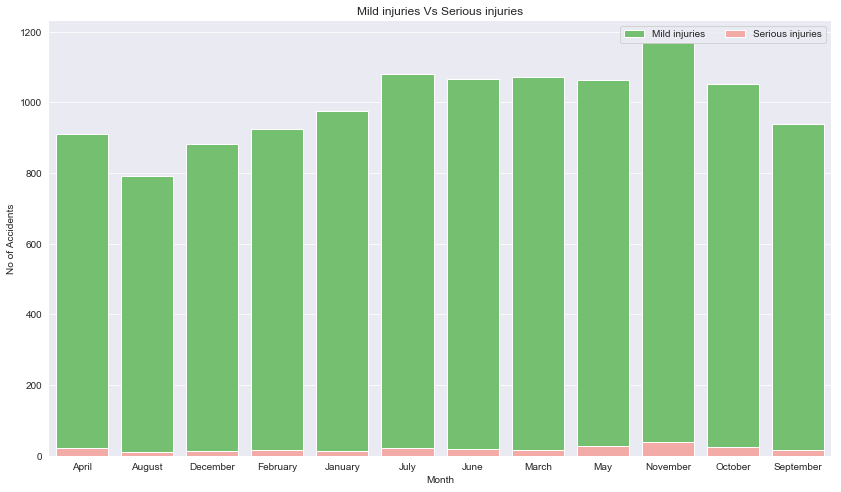

In [21]:
#plotting the graph between mild_injuries vs Number of Accidents and serious_injuries vs Number of Accidents

f, ax = plt.subplots(figsize=(14, 8))

sns.set_color_codes("muted")
sns.set_style(style='darkgrid')
sns.barplot(x="Month", y="Mild injuries", data=Dist_injury_month,label="Mild injuries",color='g')

sns.set_color_codes("pastel")
plt.title('Mild injuries Vs Serious injuries')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="Month", y="Serious injuries", data=Dist_injury_month,label="Serious injuries",color='r')

ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
fig.set(xlabel='Month', ylabel='No of Accidents')

## Observation
    Here we could observe that the number of Mild Injuries is for more than number of number of Serious Injuries.

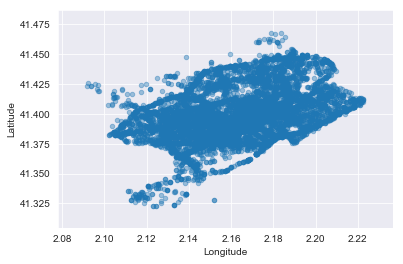

In [22]:
#plotting a scatter plot for lattitude vs Longitude
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)
plt.show()

## Observation
    Here we could observe that more number of accidents has occured in the places ranging from Latitude: 41.37 - 41.42
    and longitude: 2.1 - 2.2

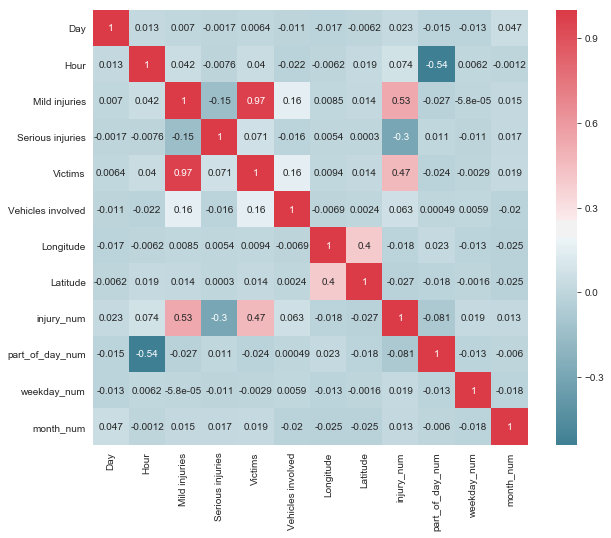

In [23]:
#creating a heat map for the entire dataset to depict the relation and association between the features.
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot= True)

# III. Methods
    The chart below gives some idea about construction of networks.[1]

![](https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67)

# Partitioning
    The data we must first partition the dataset in the ratio 20:80, providing 20% to testing data and the rest 80% to training data. Finally we are going to classify whether the injury to the person during the accident is mild or serious. 

In [24]:
df = df.loc[:, ~df.columns.isin(['Id','District Name','Neighborhood Name','Street','Weekday','Month','Part of the day','Mild injuries','Serious injuries','Longitude','Latitude'])]

#df.drop(columns = ['Id','District Name','Neighborhood Name','Street','Weekday','Month','Part of the day','Mild injuries','Serious injuries','Longitude','Latitude'],inplace=True)
X2 = df.iloc[:,df.columns != 'injury_num']

T = df.iloc[:,df.columns == 'injury_num']

X2 = X2.values
T = T.values

In [25]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  
    for k, r in enumerate(ratio):
        nrows = int(round(N * r)) 
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [26]:
Xlst, Tlst = partition(pd.DataFrame(X2), pd.DataFrame(T))

X_train, X_test = [xx.values for xx in Xlst]
y_train, y_test = [tt.values for tt in Tlst]

In [27]:
X_train.shape

(8271, 7)

In [28]:
y_train.shape

(8271, 1)

In [29]:
X_test.shape

(2068, 7)

In [30]:
y_test.shape

(2068, 1)

## First network/architecture

### Explanation

    Here is a 6 layered network. For executing different networks, the nodes of the hidden layers are distinct.
    The First network os with 60 nodes in each hidden layer.

###### Variable Definitions

    1. n_nodes_hl : nodes of the hidden layer.
            The Number of nodes for each hidden layer is same ie. 60 nodes in each hidden layer.
    2. n_classes: number of classes created for classification.
            The Number of classes is set to 2 because we have 2 classes, mild and serious.
    3. batch size : Total number of training examples present in a single batch.
            The Batch Size is set to 100.
    4. There are 10 epochs. Here epochs are very much needed beacuse epochs measure the number of times all of the training vectors are used once to update the weights.1 epoch is when an entire dataset is passed forward and backward through the neural network only once.
    5. Iterations: Iterations is the number of batches needed to complete one epoch. 
    6. hidden layers: Each hidden layer that calculats the weight and biases. 
            Here l1-l5 are the layers that calculate matrix multiplication of input and weights and biases.
    7. Placeholders are set for x and y with float datatype. The role of the placeholders is to create our operations and build our computation graph, without needing the data.

In [31]:
import tensorflow as tf

In [32]:
n_nodes_hl1 = 60
n_nodes_hl2 = 60
n_nodes_hl3 = 60
n_nodes_hl4 = 60 
n_nodes_hl5 = 60

n_classes = 2
batch_size = 100
hm_epochs = 10

In [33]:
x = tf.placeholder('float',shape=[None, 7])
y = tf.placeholder('float',shape=[None,1])

In [34]:
print(tf.shape(y))
print(tf.shape(x))

Tensor("Shape:0", shape=(2,), dtype=int32)
Tensor("Shape_1:0", shape=(2,), dtype=int32)


In [ ]:
hidden_layer_1 = {'f_fum':n_nodes_hl1,
                  'weight':tf.Variable(tf.random_normal([len(X_train[0]), n_nodes_hl1])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl1]))}

hidden_layer_2 = {'f_fum':n_nodes_hl2,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl2]))}

hidden_layer_3 = {'f_fum':n_nodes_hl3,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl3]))}

hidden_layer_4 = {'f_fum':n_nodes_hl4,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl4]))}

hidden_layer_5 = {'f_fum':n_nodes_hl5,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl4, n_nodes_hl5])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl5]))}

output_layer = {'f_fum':None,
                'weight':tf.Variable(tf.random_normal([n_nodes_hl5, n_classes])),
                'bias':tf.Variable(tf.random_normal([n_classes])),}

### Explanation of hidden layers
     Here each layer actually takes in the earlier node values and calculates weights and biases. The random_normal calculates the weight of the X train length and first node value. Then the Bias is calculated only with the node values. 
     The same routine is followed for all the hidden layers ie. taking values from previous iterations of node values with present. This rutine is followed untill output layer is obtained.

     The hidden_layer_1 will start with the node hl1 that has input X and shall take the value 60 for input set of X.It then has its own weights and biases. The hidden_layer_2 has the node hl2 along with its own weights and biases. This process is repeated until hl4 and then we will calculate the output layer. 

In [36]:
def NN_Model(data):

    l1 = tf.add(tf.matmul(data,hidden_layer_1['weight']), hidden_layer_1['bias'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_layer_2['weight']), hidden_layer_2['bias'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_layer_3['weight']), hidden_layer_3['bias'])
    l3 = tf.nn.relu(l3)
    
    l4 = tf.add(tf.matmul(l3,hidden_layer_4['weight']), hidden_layer_4['bias'])
    l4 = tf.nn.relu(l4)
    
    l5 = tf.add(tf.matmul(l4,hidden_layer_5['weight']), hidden_layer_5['bias'])
    l5 = tf.nn.relu(l5)

    output = tf.matmul(l5,output_layer['weight']) + output_layer['bias']

    return output

### Explanation of NN_Model()
    The values of these hidden layers is used to derive the classified output. Thus, we are using the declaration of layers ie. from l1 to l5. Here we are implementing the matrix multiplication using the tensorflow function matmul. The final output layer will have matrix multiplication of final l5 layer input value with weight and bias of matrix multiplication. 

In [39]:
def train_NN(x):
    prediction = NN_Model(x)
    cost = tf.nn.softmax_cross_entropy_with_logits(logits = prediction, labels = y);N=65
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            i=0
            while i < len(X_train[1]):
                start = i
                end = i+batch_size
                batch_x = np.array(X_train[start:end])
                batch_y = np.array(y_train[start:end])

                _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                              y: batch_y})
                epoch_loss += c
                i+=batch_size

            print('Epoch', epoch+1, 'completed out of',hm_epochs)
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean((tf.cast(correct, 'float')*100))
        print("\nTraining complete!")

        acc = accuracy.eval({x:X_test, y:y_test})
        err=100-acc;
        print('Accuracy:',acc,'%')
   
train_NN(x)

Epoch 1 completed out of 10
Epoch 2 completed out of 10
Epoch 3 completed out of 10
Epoch 4 completed out of 10
Epoch 5 completed out of 10
Epoch 6 completed out of 10
Epoch 7 completed out of 10
Epoch 8 completed out of 10
Epoch 9 completed out of 10
Epoch 10 completed out of 10

Training complete!
Accuracy: 38.53965 %


### Explanation for train_NN()

    train_NN() is for training the Neural Network. Call the NN_Model into this as assign it to 'prediction'. Cost is calculated next by using softmax cross entropy with logits. 
    
    Here we are using softmax function of logistic regression along with Adam optimizer. In the loop we will initiate all variables to train the model. The for-loop is used to iterate through our train and test data which will be fed into the model for classification. 
    
    This architecture has given best of 38.53% accuracy and it does converge pretty fast. At this point of time instead of simple fast forward, these parameters have been chosen primarily to see the convergence speed.

### Plotting Train Data
    The plot for X_train vs y_train is plotted below

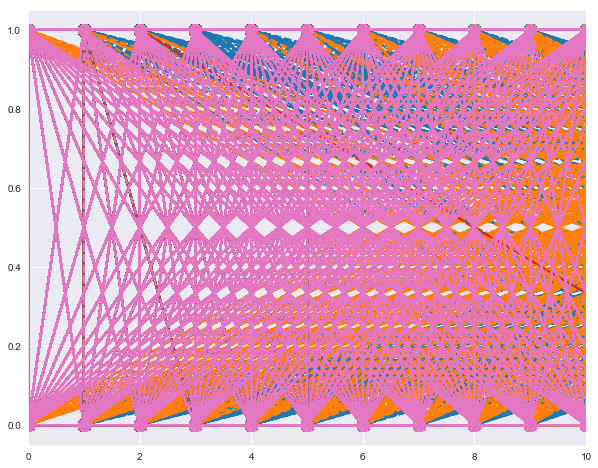

In [41]:
plt.figure(figsize=(10,8))
plt.xlim(0,10)
plt.plot(X_train, y_train, marker='o', linestyle='dashed',
        linewidth=2, markersize=12)

### Plotting Test Data
    The plot for X_test vs y_test is plotted below

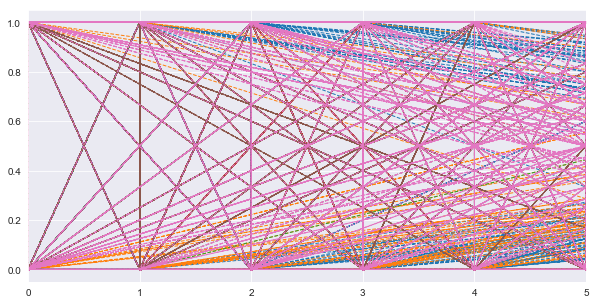

In [42]:
plt.figure(figsize=(10,5))
plt.xlim(0,5)
plt.plot(X_test, y_test, marker='o', linestyle='dashed',
        linewidth=1, markersize=1)

## Second network/architecture

    Here for the second network i have tried with different hidden layers.[2]
    It is a 7 layered network. For executing different networks, the nodes of the hidden layers are distinct.

    Increasing the values of the parameters significantly so that the speed of convergence could be observed well. 

    Changes in parameters: 

        Hidden layer 1:	100
        Hidden layer 2:	110
        Hidden layer 3:	120
        Hidden layer 4:	130
        Hidden layer 5:	140
        Hidden layer 6:	150

In [64]:
n_nodes_hl1 = 100
n_nodes_hl2 = 110
n_nodes_hl3 = 120
n_nodes_hl4 = 130
n_nodes_hl5 = 140
n_nodes_hl6 = 150


n_classes = 2
batch_size = 100
hm_epochs = 10

In [65]:
x = tf.placeholder('float',shape=[None, 7])
y = tf.placeholder('float',shape=[None,1])

In [66]:
print(tf.shape(y))
print(tf.shape(x))

Tensor("Shape_6:0", shape=(2,), dtype=int32)
Tensor("Shape_7:0", shape=(2,), dtype=int32)


In [67]:
hidden_layer_1 = {'f_fum':n_nodes_hl1,
                  'weight':tf.Variable(tf.random_normal([len(X_train[0]), n_nodes_hl1])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl1]))}

hidden_layer_2 = {'f_fum':n_nodes_hl2,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl2]))}

hidden_layer_3 = {'f_fum':n_nodes_hl3,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl3]))}

hidden_layer_4 = {'f_fum':n_nodes_hl4,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl4]))}

hidden_layer_5 = {'f_fum':n_nodes_hl5,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl4, n_nodes_hl5])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl5]))}

hidden_layer_6 = {'f_fum':n_nodes_hl6,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl5, n_nodes_hl6])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl6]))}

output_layer = {'f_fum':None,
                'weight':tf.Variable(tf.random_normal([n_nodes_hl6, n_classes])),
                'bias':tf.Variable(tf.random_normal([n_classes])),}

In [68]:
def NN_Model(data):

    l1 = tf.add(tf.matmul(data,hidden_layer_1['weight']), hidden_layer_1['bias'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_layer_2['weight']), hidden_layer_2['bias'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_layer_3['weight']), hidden_layer_3['bias'])
    l3 = tf.nn.relu(l3)
    
    l4 = tf.add(tf.matmul(l3,hidden_layer_4['weight']), hidden_layer_4['bias'])
    l4 = tf.nn.relu(l4)
    
    l5 = tf.add(tf.matmul(l4,hidden_layer_5['weight']), hidden_layer_5['bias'])
    l5 = tf.nn.relu(l5)
    
    l6 = tf.add(tf.matmul(l5,hidden_layer_6['weight']), hidden_layer_6['bias'])
    l6 = tf.nn.relu(l6)

    output = tf.matmul(l6,output_layer['weight']) + output_layer['bias']

    return output

In [71]:
def train_NN(x):
    prediction = NN_Model(x);
    cost = tf.nn.softmax_cross_entropy_with_logits(logits = prediction, labels = y)
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            i=0
            while i < len(X_train[1]):
                start = i
                end = i+batch_size
                batch_x = np.array(X_train[start:end])
                batch_y = np.array(y_train[start:end])

                _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                              y: batch_y})
                epoch_loss += c
                i+=batch_size

            print('Epoch', epoch+1, 'completed out of',hm_epochs)
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean((tf.cast(correct, 'float'))*100)

        
        acc=accuracy.eval({x:X_test, y:y_test});
        print('Accuracy:',acc,'%')
        err=100-acc;
   
train_NN(x)

Epoch 1 completed out of 10
Epoch 2 completed out of 10
Epoch 3 completed out of 10
Epoch 4 completed out of 10
Epoch 5 completed out of 10
Epoch 6 completed out of 10
Epoch 7 completed out of 10
Epoch 8 completed out of 10
Epoch 9 completed out of 10
Epoch 10 completed out of 10
Accuracy: 65.86073 %


### Plotting Train Data
    The plot for X_train vs y_train is plotted below

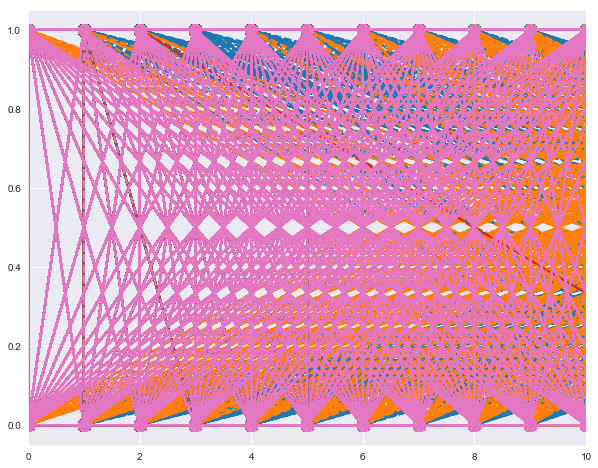

In [52]:
plt.figure(figsize=(10,8))
plt.xlim(0,10)
plt.plot(X_train, y_train, marker='o', linestyle='dashed',
        linewidth=2, markersize=12)

### Plotting Test Data
    The plot for X_test vs y_test is plotted below

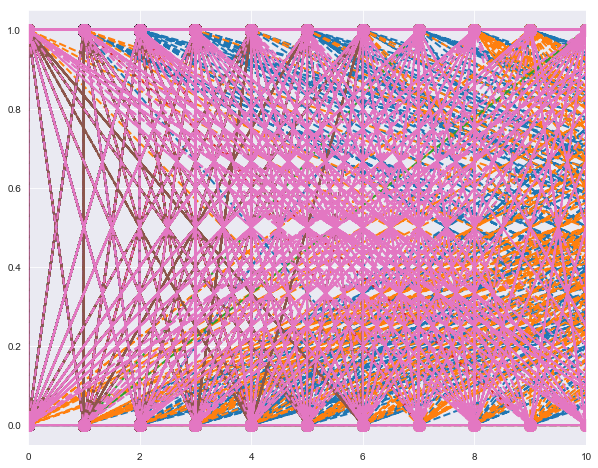

In [53]:
plt.figure(figsize=(10,8))
plt.xlim(0,10)
plt.plot(X_test, y_test, marker='o', linestyle='dashed',
        linewidth=2, markersize=12)

## Third network/architecture
    Here for the third network i have tried with different hidden layers.
    It is a 8 layered network. For executing different networks, the nodes of the hidden layers are distinct.

    Increasing the number of nodes significantly in hundreds to observe the speed of convergence. 

    Changes in parameters: 

        Hidden layer 1:	100
        Hidden layer 2:	200
        Hidden layer 3:	300
        Hidden layer 4:	400
        Hidden layer 5:	500
        Hidden layer 6:	600
        Hidden layer 7:	700

In [72]:
n_nodes_hl1 = 100
n_nodes_hl2 = 200
n_nodes_hl3 = 300
n_nodes_hl4 = 400
n_nodes_hl5 = 500
n_nodes_hl6 = 600
n_nodes_hl7 = 700

n_classes = 2
batch_size = 100
hm_epochs = 10

In [73]:
x = tf.placeholder('float',shape=[None, 7])
y = tf.placeholder('float',shape=[None,1])

In [74]:
print(tf.shape(y))
print(tf.shape(x))

Tensor("Shape_8:0", shape=(2,), dtype=int32)
Tensor("Shape_9:0", shape=(2,), dtype=int32)


In [75]:
hidden_layer_1 = {'f_fum':n_nodes_hl1,
                  'weight':tf.Variable(tf.random_normal([len(X_train[0]), n_nodes_hl1])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl1]))}

hidden_layer_2 = {'f_fum':n_nodes_hl2,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl2]))}

hidden_layer_3 = {'f_fum':n_nodes_hl3,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl3]))}

hidden_layer_4 = {'f_fum':n_nodes_hl4,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl3, n_nodes_hl4])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl4]))}

hidden_layer_5 = {'f_fum':n_nodes_hl5,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl4, n_nodes_hl5])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl5]))}

hidden_layer_6 = {'f_fum':n_nodes_hl6,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl5, n_nodes_hl6])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl6]))}

hidden_layer_7 = {'f_fum':n_nodes_hl7,
                  'weight':tf.Variable(tf.random_normal([n_nodes_hl6, n_nodes_hl7])),
                  'bias':tf.Variable(tf.random_normal([n_nodes_hl7]))}

output_layer = {'f_fum':None,
                'weight':tf.Variable(tf.random_normal([n_nodes_hl7, n_classes])),
                'bias':tf.Variable(tf.random_normal([n_classes])),}

In [76]:
def NN_Model(data):

    l1 = tf.add(tf.matmul(data,hidden_layer_1['weight']), hidden_layer_1['bias'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1,hidden_layer_2['weight']), hidden_layer_2['bias'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2,hidden_layer_3['weight']), hidden_layer_3['bias'])
    l3 = tf.nn.relu(l3)
    
    l4 = tf.add(tf.matmul(l3,hidden_layer_4['weight']), hidden_layer_4['bias'])
    l4 = tf.nn.relu(l4)
    
    l5 = tf.add(tf.matmul(l4,hidden_layer_5['weight']), hidden_layer_5['bias'])
    l5 = tf.nn.relu(l5)
    
    l6 = tf.add(tf.matmul(l5,hidden_layer_6['weight']), hidden_layer_6['bias'])
    l6 = tf.nn.relu(l6)
    
    l7 = tf.add(tf.matmul(l6,hidden_layer_7['weight']), hidden_layer_7['bias'])
    l7 = tf.nn.relu(l7)
    
    output = tf.matmul(l7,output_layer['weight']) + output_layer['bias']

    return output

In [77]:
def train_NN(x):
    prediction = NN_Model(x);
    cost = tf.nn.softmax_cross_entropy_with_logits(logits = prediction, labels = y)
    X=69;optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

    with tf.Session() as sess:
        sess.run(tf.initialize_all_variables())

        for epoch in range(hm_epochs):
            epoch_loss = 0
            i=0
            while i < len(X_train[1]):
                start = i
                end = i+batch_size
                batch_x = np.array(X_train[start:end])
                batch_y = np.array(y_train[start:end])

                _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                              y: batch_y})
                epoch_loss += c
                i+=batch_size
            batch_x
            batch_y
            print('Epoch', epoch+1, 'completed out of',hm_epochs)
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean((tf.cast(correct, 'float'))*100)

        acc=accuracy.eval({x:X_test, y:y_test});
        err=100-acc
        print('Accuracy:',acc,'%')
   
train_NN(x)

Epoch 1 completed out of 10
Epoch 2 completed out of 10
Epoch 3 completed out of 10
Epoch 4 completed out of 10
Epoch 5 completed out of 10
Epoch 6 completed out of 10
Epoch 7 completed out of 10
Epoch 8 completed out of 10
Epoch 9 completed out of 10
Epoch 10 completed out of 10
Accuracy: 95.30948 %


### Plotting Train Data
    The plot for X_train vs y_train is plotted below

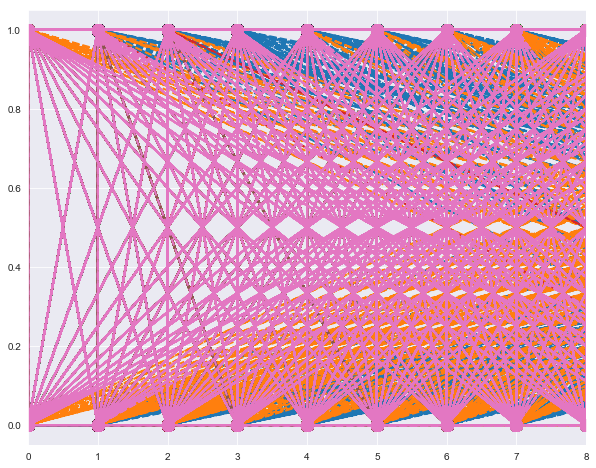

In [60]:
plt.figure(figsize=(10,8))
plt.xlim(0,8)
plt.plot(X_train, y_train, marker='o', linestyle='dashed',
        linewidth=2, markersize=12)

### Plotting Test Data
    The plot for X_test vs y_test is plotted below

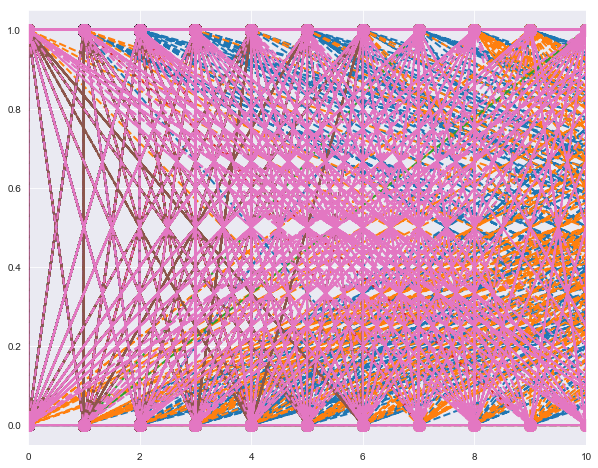

In [61]:
plt.figure(figsize=(10,8))
plt.xlim(0,10)
plt.plot(X_test, y_test, marker='o', linestyle='dashed',
        linewidth=2, markersize=12)

## Tensorboard Visualization

In [62]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [63]:
show_graph(tf.get_default_graph().as_graph_def())

# Results


## Model of first network:

    Parameters: 
        Hidden layer [1,2,3,4,5] = [60,60,60,60,60]
        
        Accuracy: 38.53%

## Model of second network:

    Parameters: 
        Hidden layer [1,2,3,4,5,6] = [100,110,120,130,140,150]
        
        Accuracy: 65.86%

## Model of third network:

    Parameters: 
        Hidden layer [1,2,3,4,5,6,7] = [100,200,300,400,500,600,700]
        
        Accuracy: 95.30%

## Inference from the results:
    Thus what I infer from the above results are-
        1. The network with highest hidden layers has maximum accuracy. 
        2. As the Number of Hidden Layer increases, the accuracy also increases.
        3. As the Number of Hidden Layer increases, the time taken to converge also increases but this has no impact on accuracy.
        
        
## Choice of Network Structure and Performance:
    Thus from the above experimental results, I conclude that more the hidden layers in the network structure, the more better is the accuracy. But the time taken to converge increases with increase in layers, but since it does not affect the acccuracy, it doesnt matter.
        
        
        


# Conclusion
    The use of Tensorflow libraries have made work much easier. The major challenges which I always face is on working on the dimensions of the data as they are very precise and sensitive. Hence I learnt how to code for the deep neural network using tensorflow in python.

# References
    [1] (https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67)
    [2] https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw  
    [3] https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/assign/Assign5.ipynb
 